## Objective

Open a new Jupyter Notebook and:

    Load the dataset using pandas
    Clean the column names (make lowercase, replace spaces with _, remove special characters)

Filter the dataset to include only schools located in Brooklyn

Answer the following:

    How many total schools are in Brooklyn?
    How many offer Grade 9 entry?

Group and summarize:

    Count of schools per borough
    Average number of students per borough
    Summary of grade_span_max grouped by borough

Create visualizations:

    Bar chart: Number of schools per borough

Write 2–3 key insights based on your findings at the end of the notebook


# my markdowns

# NYC High School Directory Exploration

In this notebook, I explore the NYC High School Directory dataset.  
The goal is to clean the data, perform basic analysis, create visualizations, and share key insights.

Dataset: high-school-directory.csv
How many total schools are in Brooklyn? How many offer Grade 9 entry?
- Brooklyn has 121 schools, of which 98 offer Grade 9.
  
- The borough with the most schools is Brooklyn with 121 interesting finding is that Queens which has only 80 schools 
   but inherits the second place in number of Students.
- to answer average number of students per borough        
borough
Bronx             490
Brooklyn          699
Manhattan         590
Queens           1047
Staten Island    1848

- On average, Staten Island has the highest number of students per school while having the least schools by far 
    also the least police stations tbf it also is a smaller part of the city anyways it faces some problems.


grade_span_max 	9 	10 	11 	12
borough 				
Bronx 	        1 	0 	8 	109
Brooklyn 	    1 	2 	1 	117
Manhattan 	    1 	3 	4 	98
Queens 	        0 	4 	6 	70
Staten Island 	0 	0 	0 	10
- Grade span distributions vary across boroughs; Queens focuses more on kids.
- The school with the most Students by quite a margin(nearly 1200) is the Brooklyn technical high school.
- visualizations i tried out are at the bottom.

In [5]:
# all my steps today reinstall anaconda i did use a trashmail last time and had to reinstall to use jupyter they wanted my pw which i unfortunately lost 
# so let's begin i need to 
# Import basic libraries - 
import pandas as pd
import matplotlib.pyplot as plt

# Read in the dataset (adjust path if needed)
df = pd.read_csv('C:/Users/Maxdesk/Documents/GitHub/_onboarding_data/daily_tasks/day_2/day_2_datasets/high-school-directory.csv')
df.head()

# i faced an issue with unicode escape which just meant backlashes weren't accepted  this probably uses linux structure 
# also that head change with clamps such wow ()



,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,Council District,Census Tract,BIN,BBL,NTA,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...,20529.0,51,3,47,59
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,NaN,NaN,...,18.0,16.0,2022205.0,2.036040e+09,Soundview-Castle Hill-Clason Point-Harding Par...,11611.0,58,5,31,26
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,NaN,NaN,...,6.0,151.0,1030341.0,1.011560e+09,Lincoln Square ...,12420.0,20,4,19,12


In [16]:
# Make columns lowercase and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Check result
df.columns
df.head()


,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,council_district,census_tract,bin,bbl,nta,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...,20529.0,51,3,47,59
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,NaN,NaN,...,18.0,16.0,2022205.0,2.036040e+09,Soundview-Castle Hill-Clason Point-Harding Par...,11611.0,58,5,31,26
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,NaN,NaN,...,6.0,151.0,1030341.0,1.011560e+09,Lincoln Square ...,12420.0,20,4,19,12


In [17]:
df.shape
# to check (rows, columns) inside the csv if i am curious
# if that is correct and of course i am so i checked inside goolge sheets to double chek and confirm

(435, 69)

In [19]:
# Filter for Brooklyn
brooklyn_schools = df[df['borough'] == 'Brooklyn']

# Count unique school names
unique_brooklyn_schools = brooklyn_schools['school_name'].nunique()

print(f"Total unique schools in Brooklyn: {unique_brooklyn_schools}")


Total unique schools in Brooklyn: 121


In [24]:
df['grade_span_max'].head()
df['grade_span_max'].dtype


dtype('int64')

In [27]:
# Filter for Brooklyn schools
brooklyn_schools = df[df['borough'] == 'Brooklyn']

# Find schools where grade_span_min = 9 (they include grade 9)
grade9_schools = brooklyn_schools[brooklyn_schools['grade_span_min'] == 9]

# Count unique schools offering grade 9
grade9_count = grade9_schools['school_name'].nunique()

print(f"Number of Brooklyn schools offering Grade 9: {grade9_count}")



Number of Brooklyn schools offering Grade 9: 98


In [29]:
# Group by borough and count schools
borough_counts = df['borough'].value_counts()
borough_counts


borough
Brooklyn         121
Bronx            118
Manhattan        106
Queens            80
Staten Island     10
Name: count, dtype: int64

In [44]:
avg_students = df.groupby('borough')['total_students'].mean()

# Rounding
avg_students = avg_students.round(0).astype(int)

# Show result
avg_students


borough
Bronx             490
Brooklyn          699
Manhattan         590
Queens           1047
Staten Island    1848
Name: total_students, dtype: int32

In [45]:
df.groupby('borough')['grade_span_max'].value_counts().unstack()


grade_span_max,9,10,11,12
borough,,,,
Bronx,1.0,NaN,8.0,109.0
Brooklyn,1.0,2.0,1.0,117.0
Manhattan,1.0,3.0,4.0,98.0
Queens,NaN,4.0,6.0,70.0
Staten Island,NaN,NaN,NaN,10.0


In [33]:
# Count grade_span_max categories per borough
grade_span_summary = df.groupby('borough')['grade_span_max'].value_counts().unstack(fill_value=0)
grade_span_summary


grade_span_max,9,10,11,12
borough,,,,
Bronx,1,0,8,109
Brooklyn,1,2,1,117
Manhattan,1,3,4,98
Queens,0,4,6,70
Staten Island,0,0,0,10


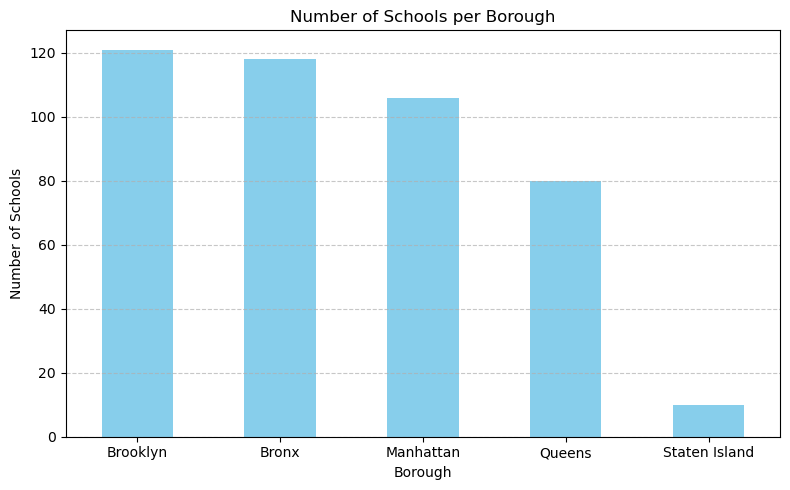

In [34]:
# Plot number of schools per borough
borough_counts.plot(kind='bar', figsize=(8,5), color='skyblue')
plt.title('Number of Schools per Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Schools')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


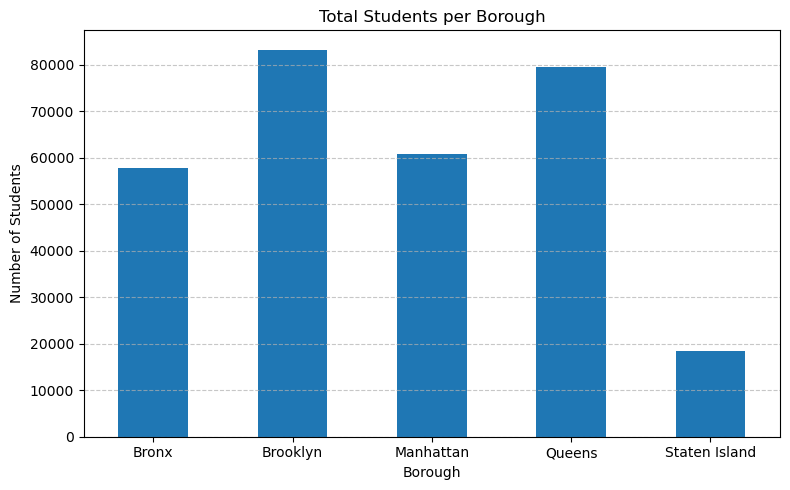

In [40]:
# Group total students per borough
students_per_borough = df.groupby('borough')['total_students'].sum()

# Plot
students_per_borough.plot(kind='bar', figsize=(8,5))
plt.title('Total Students per Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


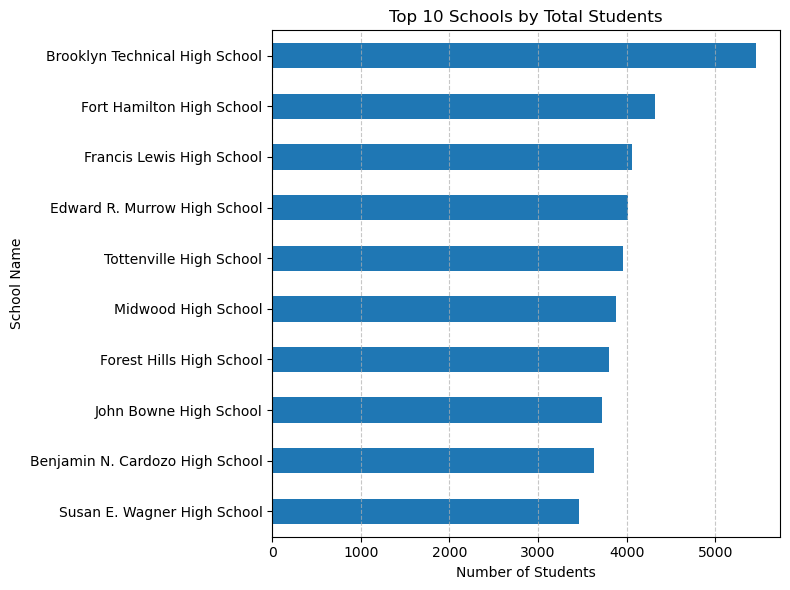

In [48]:
# Group students by school_name → take TOP 10
top10_schools = df.groupby('school_name')['total_students'].sum().sort_values(ascending=False).head(10)

# Plot
top10_schools.plot(kind='barh', figsize=(8,6))
plt.title('Top 10 Schools by Total Students')
plt.xlabel('Number of Students')
plt.ylabel('School Name')
plt.gca().invert_yaxis()  # largest at top
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [38]:
df['police_precincts'].head()
df['police_precincts'].dtype


dtype('int64')

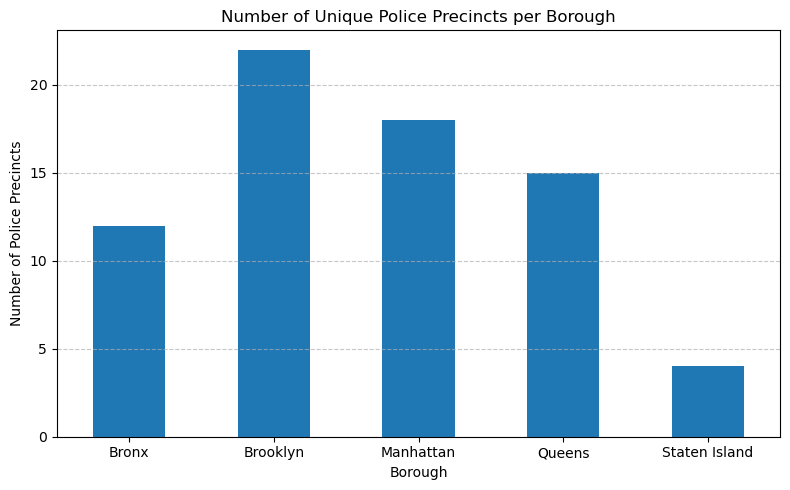

In [39]:
# Count number of unique police precincts per borough
precincts_per_borough = df.groupby('borough')['police_precincts'].nunique()

# Plot
precincts_per_borough.plot(kind='bar', figsize=(8,5))
plt.title('Number of Unique Police Precincts per Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Police Precincts')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
